# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [17]:
# 1) Importar libs e Ler o arquivo 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('previsao_de_renda.csv')

# 1, i) Dropar a coluna Unnamed: 0
df = df.drop(columns=['Unnamed: 0'])
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


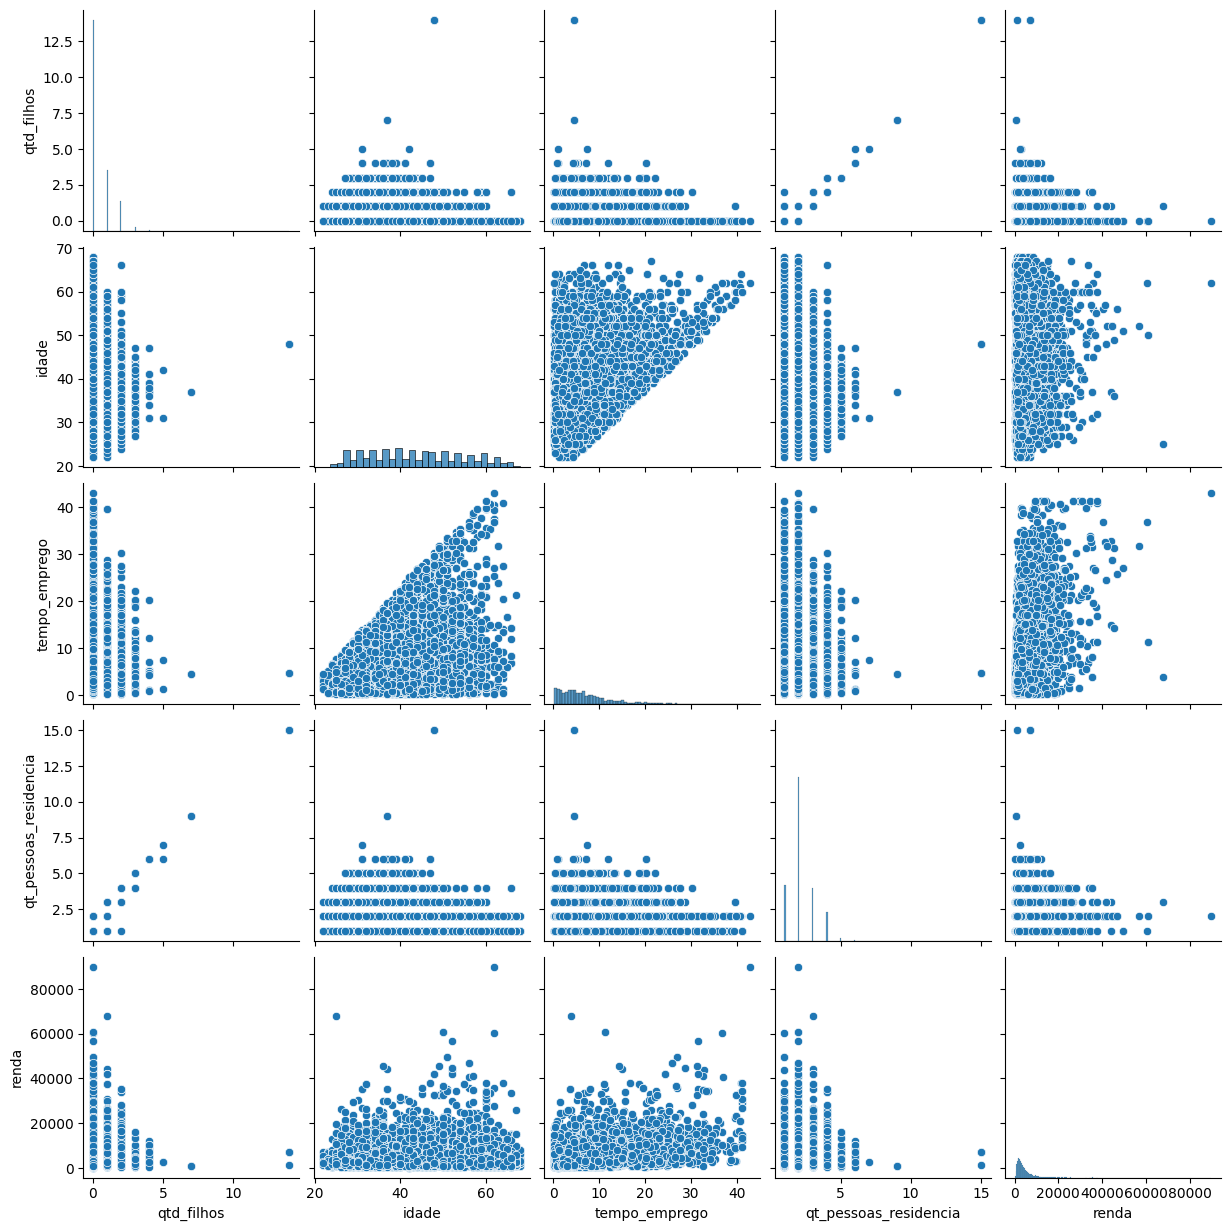

In [22]:
# 1, ii) Matriz de Dispersão

# Selecionar apenas colunas numéricas
df_numerico = df.select_dtypes(include=['number'])

# Dropar a coluna index (identificadores, não fazem sentido para a análise)
df_numerico = df_numerico.drop(columns='index')

# Plotar matriz de dispersão
sns.pairplot(df_numerico)
plt.show()

### Observações e Insights

*   **Variáveis Relacionadas a Tempo:** Existe uma correlação muito grande entra as variáveis relacionadas a tempo, como por exemplo, `idade` e `tempo_emprego`, o que faz total sentido: de fato pessoas com mais idade vão ter mais tempos de emprego.
*   **qtd_filhos e qt_pessoas_residencia**: Há uma forte correlação bem linear entre a quantidade de filhos e a quantidade de pessoas na residência, o que também faz sentido, afinal quanto mais filhos, mais pessoas vão ter na reincidência.
*   **Variável `renda`**: Nosso objeto de estudo com essa análise é a variável `renda`, da qual iremos aplicar regressão para estimar a renda dado os conjuntos de dados. Contudo, as relações não são tão fortes com essa variável, o que pode significar que vamos precisar fazer transformações nos dados ou usar técnicas mais robustas.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

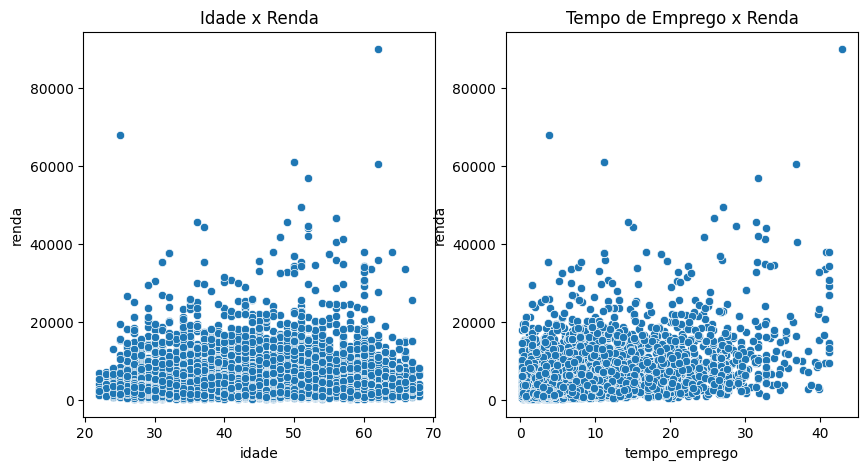

In [33]:
# 2) Scatterplot das duas variáveis mais correlacionadas com renda
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.scatterplot(x='idade', y='renda', data=df_numerico, ax=axes[0])
sns.scatterplot(x='tempo_emprego', y='renda', data=df_numerico, ax=axes[1])
axes[0].set_title('Idade x Renda')
axes[1].set_title('Tempo de Emprego x Renda')

plt.show()

As variáveis mais correlacionadas com renda são `idade` e `tempo_emprego`, mas ambas ainda apresentam uma relação muito baixa para ser considerada significativa, precisaremos, provavelmente, tratar e transformar os dados.

3) Na su aopinião, há outliers na variável renda?

Sim, certamente existem outliers na renda, isso pode ser evidenciado pelos próprios scatterplots que plotamos, em que a maioria dos pontos está geralmente concentrada na parte inferior do gráfico (valores menores), e alguns poucos valores altos dispersos e sem um padrão claro dominam o topo do gráfico (valores maiores). Isso é comum de ser observado em análises de renda: poucas pessoas ganham muito, e isso 'infla' os resultados (outliers).

4) Calcule o logaritmo da variável renda e repita a sequência de análise

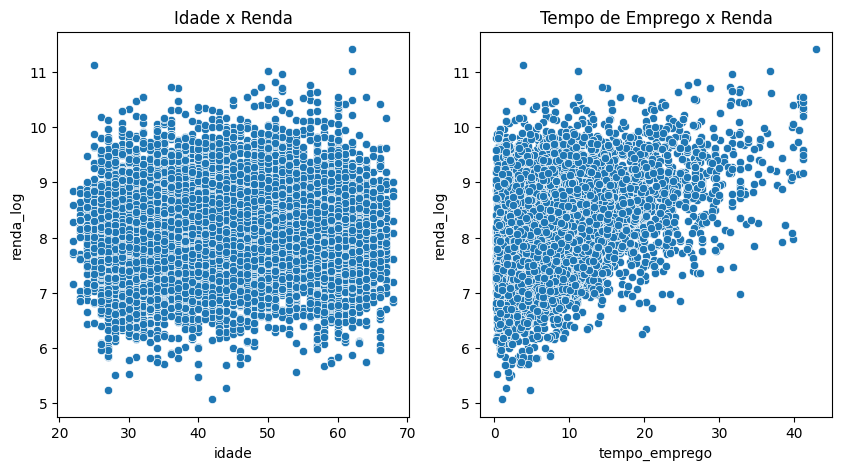

In [34]:
# 4, i) Calcular o logaritmo da variável renda
df_numerico['renda_log'] = np.log(df_numerico['renda'])

# 4, ii) Scatterplot de renda com as duas variáveis mais correlacionadas
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.scatterplot(x='idade', y='renda_log', data=df_numerico, ax=axes[0])
sns.scatterplot(x='tempo_emprego', y='renda_log', data=df_numerico, ax=axes[1])
axes[0].set_title('Idade x Renda')
axes[1].set_title('Tempo de Emprego x Renda')
plt.show()

Agora, vemos que a correlação entre `idade e renda`, se mostrou muito mais concentrada, porém uniforme, indicando fortes indícios de uma correlação baixa. Já a correlação entre **tempo de emprego e renda** começou a apresentar um padrão muito mais interessante: de fato, embora ainda haja muita dispersão, a renda logarítmica tende a aumentar conforme o tempo de emprego tende a aumentar.

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

A aplicação do log melhorou a análise, pois nos mostrou uma correlação mais clara entre as variáveis, outrora não presentes nas nossas análises iniciais devido à forte presença de outliers em renda, e as diferenças de escalas entre os dados.